# Exercises

### Do your work for this exercise in a jupyter notebook named modeling within the regression-exercises repo. Add, commit, and push your work.

1. Select a dataset with a continuous target variable.

2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [73]:
import numpy as np
import pandas as pd
import wrangle
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
import warnings
warnings.filterwarnings('ignore')

In [38]:
import wrangle

df = wrangle.wrangle_zillow()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [40]:
df = df.rename(columns = {'calculatedfinishedsquarefeet':'square_feet', 'taxvaluedollarcnt': 'house_value'})
df.head()

,bedroomcnt,bathroomcnt,square_feet,house_value,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [ ]:
df = pd.get_dummies(df, ['sex', 'smoker', 'day', 'time'], drop_first=True)

In [41]:
train, validate, test = wrangle.split_zillow(df)
train.shape, validate.shape, test.shape

((1178202, 7), (392735, 7), (523646, 7))

In [42]:
# set baseline

train['baseline'] = train.house_value.mean()
train.head()

,bedroomcnt,bathroomcnt,square_feet,house_value,yearbuilt,taxamount,fips,baseline
176880,3,2.0,1714,115157,1973,1282.32,6059,398683.705141
331975,3,3.0,1862,345618,1958,5530.82,6059,398683.705141
1753349,5,5.0,3959,1451000,1953,15884.95,6037,398683.705141
120218,3,3.0,2100,459187,1962,5619.06,6037,398683.705141
1991743,4,2.0,1954,403193,1980,5047.67,6037,398683.705141


In [56]:
x_train = train.drop(columns=['house_value','baseline', 'taxamount'])
y_train = train.house_value
x_validate = validate.drop(columns=['house_value', 'taxamount'])
y_validate = validate[['house_value']]
x_test = test.drop(columns=['house_value', 'taxamount'])
y_test = test.house_value

In [19]:
x_train.head()

,bedroomcnt,bathroomcnt,square_feet,yearbuilt,fips
176880,3,2.0,1714,1973,6059
331975,3,3.0,1862,1958,6059
1753349,5,5.0,3959,1953,6037
120218,3,3.0,2100,1962,6037
1991743,4,2.0,1954,1980,6037


In [20]:
y_train.head()

,house_value,baseline
176880,115157,398683.705141
331975,345618,398683.705141
1753349,1451000,398683.705141
120218,459187,398683.705141
1991743,403193,398683.705141


In [57]:
# scale the data

scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled)
x_train_scaled = x_train_scaled.rename(columns = {0 :'bedroomcnt_scaled',1 :'bathroomcnt_scaled',
                                                  2 : 'square_feet_scaled', 3 : 'yearbuilt_scaled', 4 : 'fips_scaled'})

x_validate_scaled = pd.DataFrame(x_validate_scaled)
x_validate_scaled = x_validate_scaled.rename(columns = {0 :'bedroomcnt_scaled',1 :'bathroomcnt_scaled',
                                                        2 : 'square_feet_scaled', 3 : 'yearbuilt_scaled', 4 : 'fips_scaled'})

x_test_scaled = pd.DataFrame(x_test_scaled)
x_test_scaled = x_test_scaled.rename(columns = {0 :'bedroomcnt_scaled',1 :'bathroomcnt_scaled',
                                                2 : 'square_feet_scaled', 3 : 'yearbuilt_scaled', 4 : 'fips_scaled'})


In [34]:
x_train_scaled.head()

,bedroomcnt_scaled,bathroomcnt_scaled,square_feet_scaled,yearbuilt_scaled,fips_scaled
0,0.500000,0.333333,0.001798,0.800000,0.297297
1,0.500000,0.500000,0.001954,0.730233,0.297297
2,0.833333,0.833333,0.004155,0.706977,0.000000
3,0.500000,0.500000,0.002204,0.748837,0.000000
4,0.666667,0.333333,0.002050,0.832558,0.000000


In [58]:
predictions = pd.DataFrame({'actual': validate.house_value})
predictions.head()

,actual
1253014,37842
174727,66105
1872959,47575
1921652,412296
636654,257421


## Simple Model

In [59]:
from sklearn.linear_model import LinearRegression

x_train_simple_model = x_train_scaled[['square_feet_scaled']]
y_train_simple_model = train.house_value

# 1. make the thing
lm = LinearRegression()

# 2. fit the thing
lm.fit(x_train_simple_model, y_train_simple_model)

# 3. use the thing (make predictions)
x_validate_simple_model = x_validate_scaled[['square_feet_scaled']]

predictions['simple_lm'] = lm.predict(x_validate_simple_model)

In [48]:
predictions.head()

,actual,simple_lm
1253014,37842,331238.589470
174727,66105,333018.512416
1872959,47575,336756.350601
1921652,412296,364167.163958
636654,257421,371820.832623


In [50]:
# Examine The Model

lm.coef_, lm.intercept_

(array([84775504.98112516]), 238771.59246176435)

In [51]:
print('house_value = {:.3f} * square_feet + {:.3f}'.format(lm.coef_[0], lm.intercept_))

house_value = 84775504.981 * square_feet + 238771.592


## Multiple Regression + RFE

In [94]:
lm = LinearRegression()
k = 2

# 1. Transform our X
rfe = RFE(lm, n_features_to_select=2)
rfe.fit(x_train_scaled, y_train)

print('selected top 2 features:', x_train_scaled.columns[rfe.support_])
x_train_scaled_rfe = rfe.transform(x_train_scaled)

selected top 2 features: Index(['bathroomcnt_scaled', 'square_feet_scaled'], dtype='object')


In [95]:
x_train_scaled.shape, x_train_scaled_rfe.shape

((1178202, 5), (1178202, 2))

In [96]:
# 2. Use the transformed x in our model
lm.fit(x_train_scaled_rfe, y_train)

# 3. Make predictions
X_validate_scaled_rfe = rfe.transform(x_validate_scaled)
predictions['multiple_rfe'] = lm.predict(X_validate_scaled_rfe)

predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction,lasso_lars,glm,baseline
1253014,37842,331238.589470,343826.628139,242092.197467,303907.790102,345226.714232,343813.031423,398683.705141
174727,66105,333018.512416,187094.295577,241911.641425,238715.716224,201509.188903,237868.250053,398683.705141
1872959,47575,336756.350601,345978.720983,242653.886203,283810.063700,324162.613859,337422.771320,398683.705141
1921652,412296,364167.163958,356669.762853,305999.876445,335058.555141,358424.809111,343989.812637,398683.705141
636654,257421,371820.832623,359654.923895,353774.926408,334162.511635,366862.828145,352612.260367,398683.705141


In [62]:
# Examine the Model

x_train_scaled.columns[rfe.support_]

Index(['bathroomcnt_scaled', 'square_feet_scaled'], dtype='object')

In [63]:
lm.coef_, lm.intercept_

(array([  944559.33636094, 33064997.43216699]), -7091.394703968894)

In [64]:
print(f'house_value = {lm.coef_[0]:.2f} x bathroomcnt + {lm.coef_[1]:.2f} x square_feet + {lm.intercept_:.2f}')

house_value = 944559.34 x bathroomcnt + 33064997.43 x square_feet + -7091.39


## Polynomial Features

In [75]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

poly.fit(x_train_scaled)
x_train_scaled_poly = pd.DataFrame(poly.transform(x_train_scaled),
                                   columns=poly.get_feature_names(x_train_scaled.columns),index=train.index,)
x_train_scaled_poly.head()

,bedroomcnt_scaled,bathroomcnt_scaled,square_feet_scaled,yearbuilt_scaled,fips_scaled,bedroomcnt_scaled^2,bedroomcnt_scaled bathroomcnt_scaled,bedroomcnt_scaled square_feet_scaled,bedroomcnt_scaled yearbuilt_scaled,bedroomcnt_scaled fips_scaled,bathroomcnt_scaled^2,bathroomcnt_scaled square_feet_scaled,bathroomcnt_scaled yearbuilt_scaled,bathroomcnt_scaled fips_scaled,square_feet_scaled^2,square_feet_scaled yearbuilt_scaled,square_feet_scaled fips_scaled,yearbuilt_scaled^2,yearbuilt_scaled fips_scaled,fips_scaled^2
176880,0.500000,0.333333,0.001798,0.800000,0.297297,0.250000,0.166667,0.000899,0.400000,0.148649,0.111111,0.000599,0.266667,0.099099,0.000003,0.001439,0.000535,0.640000,0.237838,0.088386
331975,0.500000,0.500000,0.001954,0.730233,0.297297,0.250000,0.250000,0.000977,0.365116,0.148649,0.250000,0.000977,0.365116,0.148649,0.000004,0.001427,0.000581,0.533240,0.217096,0.088386
1753349,0.833333,0.833333,0.004155,0.706977,0.000000,0.694444,0.694444,0.003463,0.589147,0.000000,0.694444,0.003463,0.589147,0.000000,0.000017,0.002938,0.000000,0.499816,0.000000,0.000000
120218,0.500000,0.500000,0.002204,0.748837,0.000000,0.250000,0.250000,0.001102,0.374419,0.000000,0.250000,0.001102,0.374419,0.000000,0.000005,0.001650,0.000000,0.560757,0.000000,0.000000
1991743,0.666667,0.333333,0.002050,0.832558,0.000000,0.444444,0.222222,0.001367,0.555039,0.000000,0.111111,0.000683,0.277519,0.000000,0.000004,0.001707,0.000000,0.693153,0.000000,0.000000


In [76]:
# 2. Use the features

lm = LinearRegression()
lm.fit(x_train_scaled_poly, y_train)

x_validate_scaled_poly = poly.transform(x_validate_scaled)
predictions['polynomial degree 2'] = lm.predict(x_validate_scaled_poly)
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction
1253014,37842,331238.589470,343826.628139,242092.197467,303907.790102
174727,66105,333018.512416,187094.295577,241911.641425,238715.716224
1872959,47575,336756.350601,345978.720983,242653.886203,283810.063700
1921652,412296,364167.163958,356669.762853,305999.876445,335058.555141
636654,257421,371820.832623,359654.923895,353774.926408,334162.511635


In [77]:
# Examine the coefficients of the resulting model.

feature_names = poly.get_feature_names(x_train_scaled.columns)
pd.Series(lm.coef_, index=feature_names).sort_values()

square_feet_scaled^2                    -2.066433e+08
square_feet_scaled                      -2.738453e+07
square_feet_scaled fips_scaled          -1.620424e+07
yearbuilt_scaled                        -7.233446e+05
bedroomcnt_scaled bathroomcnt_scaled    -7.092438e+05
fips_scaled                             -5.190087e+05
bedroomcnt_scaled yearbuilt_scaled      -3.586208e+05
bathroomcnt_scaled fips_scaled          -2.649579e+05
fips_scaled^2                           -2.521200e+05
bedroomcnt_scaled^2                     -5.858125e+04
bathroomcnt_scaled yearbuilt_scaled      4.786322e+02
bedroomcnt_scaled fips_scaled            2.242506e+04
bedroomcnt_scaled                        2.183299e+05
yearbuilt_scaled^2                       2.429962e+05
bathroomcnt_scaled                       3.087244e+05
bathroomcnt_scaled^2                     3.911615e+05
yearbuilt_scaled fips_scaled             1.133414e+06
bedroomcnt_scaled square_feet_scaled     5.464695e+07
bathroomcnt_scaled square_fe

In [74]:
# Another model with only interaction terms

poly1 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly1.fit(x_train_scaled)
x_train_scaled_poly1 = pd.DataFrame(poly1.transform(x_train_scaled),
                                    columns=poly1.get_feature_names(x_train_scaled.columns),index=train.index,)

lm = LinearRegression()
lm.fit(X_train_scaled_poly1, y_train)

x_validate_scaled_poly1 = poly1.transform(x_validate_scaled)
predictions['polynomial only interaction'] = lm.predict(x_validate_scaled_poly1)

predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction
1253014,37842,331238.589470,343826.628139,242092.197467,303907.790102
174727,66105,333018.512416,187094.295577,241911.641425,238715.716224
1872959,47575,336756.350601,345978.720983,242653.886203,283810.063700
1921652,412296,364167.163958,356669.762853,305999.876445,335058.555141
636654,257421,371820.832623,359654.923895,353774.926408,334162.511635


In [86]:
pd.Series(lm.coef_, index=poly1.get_feature_names(x_train_scaled.columns)).sort_values()

ValueError: Length of values (20) does not match length of index (15)

## Lasso-Lars

In [79]:
from sklearn.linear_model import LassoLars

# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data
lars.fit(x_train_scaled, y_train)

# predict validate
x_validate_scaled_pred_lars = lars.predict(x_validate_scaled)

# Add lassolars predictions to our predictions DataFrame
predictions['lasso_lars'] = x_validate_scaled_pred_lars
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction,lasso_lars
1253014,37842,331238.589470,343826.628139,242092.197467,303907.790102,345226.714232
174727,66105,333018.512416,187094.295577,241911.641425,238715.716224,201509.188903
1872959,47575,336756.350601,345978.720983,242653.886203,283810.063700,324162.613859
1921652,412296,364167.163958,356669.762853,305999.876445,335058.555141,358424.809111
636654,257421,371820.832623,359654.923895,353774.926408,334162.511635,366862.828145


In [83]:
pd.Series(lars.coef_, index=x_train_scaled.columns).sort_values()

bedroomcnt_scaled    -1.718762e+05
yearbuilt_scaled      0.000000e+00
fips_scaled           1.806392e+04
bathroomcnt_scaled    1.038462e+06
square_feet_scaled    3.397885e+07
dtype: float64

In [84]:
pd.Series(lm.coef_, index=poly.get_feature_names(x_train_scaled.columns)).sort_values()

square_feet_scaled^2                    -2.066433e+08
square_feet_scaled                      -2.738453e+07
square_feet_scaled fips_scaled          -1.620424e+07
yearbuilt_scaled                        -7.233446e+05
bedroomcnt_scaled bathroomcnt_scaled    -7.092438e+05
fips_scaled                             -5.190087e+05
bedroomcnt_scaled yearbuilt_scaled      -3.586208e+05
bathroomcnt_scaled fips_scaled          -2.649579e+05
fips_scaled^2                           -2.521200e+05
bedroomcnt_scaled^2                     -5.858125e+04
bathroomcnt_scaled yearbuilt_scaled      4.786322e+02
bedroomcnt_scaled fips_scaled            2.242506e+04
bedroomcnt_scaled                        2.183299e+05
yearbuilt_scaled^2                       2.429962e+05
bathroomcnt_scaled                       3.087244e+05
bathroomcnt_scaled^2                     3.911615e+05
yearbuilt_scaled fips_scaled             1.133414e+06
bedroomcnt_scaled square_feet_scaled     5.464695e+07
bathroomcnt_scaled square_fe

## Generalized Linear Model

In [80]:
from sklearn.linear_model import TweedieRegressor

# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data
glm.fit(x_train_scaled, y_train)

# predict validate
x_validate_scaled_predict_glm = glm.predict(x_validate_scaled)

# Add lassolars predictions to our predictions DataFrame
predictions['glm'] = x_validate_scaled_predict_glm
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction,lasso_lars,glm
1253014,37842,331238.589470,343826.628139,242092.197467,303907.790102,345226.714232,343813.031423
174727,66105,333018.512416,187094.295577,241911.641425,238715.716224,201509.188903,237868.250053
1872959,47575,336756.350601,345978.720983,242653.886203,283810.063700,324162.613859,337422.771320
1921652,412296,364167.163958,356669.762853,305999.876445,335058.555141,358424.809111,343989.812637
636654,257421,371820.832623,359654.923895,353774.926408,334162.511635,366862.828145,352612.260367


In [81]:
pd.Series(glm.coef_, index=x_train_scaled.columns).sort_values()

bedroomcnt_scaled    -0.260485
fips_scaled           0.074674
yearbuilt_scaled      0.234725
bathroomcnt_scaled    2.399237
square_feet_scaled    4.134153
dtype: float64

In [82]:
glm.intercept_

11.905712159430921

## TL;DR

(array([323495., 404535., 230449., 107765.,  50108.,  24634.,  15263.,
          9997.,   6919.,   5037.]),
 array([2.2000000e+01, 2.0001930e+05, 4.0001660e+05, 6.0001390e+05,
        8.0001120e+05, 1.0000085e+06, 1.2000058e+06, 1.4000031e+06,
        1.6000004e+06, 1.7999977e+06, 1.9999950e+06]),
 <BarContainer object of 10 artists>)

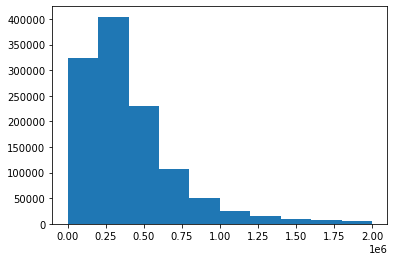

In [87]:
plt.hist(y_train)

## Evaluation

In [88]:
# add a baseline model

predictions['baseline'] = train.house_value.mean()
predictions.head()

,actual,simple_lm,multiple_rfe,polynomial degree 2,polynomial only interaction,lasso_lars,glm,baseline
1253014,37842,331238.589470,343826.628139,242092.197467,303907.790102,345226.714232,343813.031423,398683.705141
174727,66105,333018.512416,187094.295577,241911.641425,238715.716224,201509.188903,237868.250053,398683.705141
1872959,47575,336756.350601,345978.720983,242653.886203,283810.063700,324162.613859,337422.771320,398683.705141
1921652,412296,364167.163958,356669.762853,305999.876445,335058.555141,358424.809111,343989.812637,398683.705141
636654,257421,371820.832623,359654.923895,353774.926408,334162.511635,366862.828145,352612.260367,398683.705141


In [89]:
# Calculate mean squared error for every column in the dataframe

def calculate_mse(y_predicted):
    return mean_squared_error(predictions.actual, y_predicted)

predictions.apply(calculate_mse).sort_values()

actual                         0.000000e+00
polynomial degree 2            6.102737e+10
polynomial only interaction    6.596594e+10
lasso_lars                     6.938237e+10
multiple_rfe                   6.994420e+10
glm                            7.002387e+10
simple_lm                      7.751365e+10
baseline                       9.844317e+10
dtype: float64

## Evaluate on Test: Best Model (2nd Degree Polynomial)

In [91]:
# re-create our polynomial model
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(x_train_scaled)
x_train_scaled_poly = pd.DataFrame(poly.transform(x_train_scaled),
                                   columns=poly.get_feature_names(x_train_scaled.columns),index=train.index,)

lm = LinearRegression()
lm.fit(x_train_scaled_poly, y_train)

LinearRegression()

In [92]:
# any transformations applied to your training data must be applied to the test as well

x_test_scaled_poly = poly.transform(x_test_scaled)

test_predictions = lm.predict(x_test_scaled_poly)
test_actual = test.house_value

In [93]:
mean_squared_error(test_actual, test_predictions)

61046486668.43699